In [4]:
!pip install face_recognition tensorflow scikit-learn matplotlib
import os
import numpy as np
import tensorflow as tf
import face_recognition
from PIL import Image
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
from sklearn.model_selection import train_test_split
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [10]:
import os
import face_recognition
from PIL import Image, ImageDraw

# Diretório para salvar imagens com faces destacadas
output_directory = "/content/drive/MyDrive/Reconhecimento_Facial/database_2"
os.makedirs(output_directory, exist_ok=True)

def highlight_faces(input_image_path, output_image_path):
    # Carregar a imagem usando face_recognition
    image = face_recognition.load_image_file(input_image_path)

    # Detectar todas as faces na imagem
    face_locations = face_recognition.face_locations(image)

    # Converter a imagem para um formato que o PIL pode trabalhar
    pil_image = Image.fromarray(image)

    # Criar um objeto ImageDraw para desenhar sobre a imagem
    draw = ImageDraw.Draw(pil_image)

    # Desenhar um retângulo ao redor de cada face detectada
    for top, right, bottom, left in face_locations:
        draw.rectangle(((left, top), (right, bottom)), outline="red", width=5)

    # Salvar a imagem resultante no diretório especificado
    pil_image.save(output_image_path)
    print(f"Imagem salva em {output_image_path} com {len(face_locations)} faces destacadas.")

def process_and_highlight_faces(image_dir, output_dir):
    for filename in os.listdir(image_dir):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            try:
                input_image_path = os.path.join(image_dir, filename)
                output_image_path = os.path.join(output_dir, filename)
                highlight_faces(input_image_path, output_image_path)
            except Exception as e:
                print(f"Erro ao processar a imagem {filename}: {e}")

# Diretório contendo as imagens de entrada
input_directory = "/content/drive/MyDrive/Reconhecimento_Facial/test"

# Processar e destacar faces nas imagens
process_and_highlight_faces(input_directory, output_directory)


A saída de streaming foi truncada nas últimas 5000 linhas.
Imagem salva em /content/drive/MyDrive/Reconhecimento_Facial/database_2/0 (2097).jpg com 1 faces destacadas.
Imagem salva em /content/drive/MyDrive/Reconhecimento_Facial/database_2/0 (2080).jpg com 1 faces destacadas.
Imagem salva em /content/drive/MyDrive/Reconhecimento_Facial/database_2/0 (2093).jpg com 1 faces destacadas.
Imagem salva em /content/drive/MyDrive/Reconhecimento_Facial/database_2/0 (2112).jpg com 1 faces destacadas.
Imagem salva em /content/drive/MyDrive/Reconhecimento_Facial/database_2/0 (2092).jpg com 1 faces destacadas.
Imagem salva em /content/drive/MyDrive/Reconhecimento_Facial/database_2/0 (2099).jpg com 0 faces destacadas.
Imagem salva em /content/drive/MyDrive/Reconhecimento_Facial/database_2/0 (2096).jpg com 1 faces destacadas.
Imagem salva em /content/drive/MyDrive/Reconhecimento_Facial/database_2/0 (2085).jpg com 1 faces destacadas.
Imagem salva em /content/drive/MyDrive/Reconhecimento_Facial/database

In [11]:
import os
import numpy as np
from PIL import Image
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt
import re
import face_recognition

# Diretórios
highlighted_faces_dir = "/content/drive/MyDrive/Reconhecimento_Facial/database_2"
original_faces_dir = "/content/drive/MyDrive/Reconhecimento_Facial/test"
model_save_path = "/content/drive/MyDrive/Reconhecimento_Facial/saved_model_3"
history_save_path = "/content/drive/MyDrive/Reconhecimento_Facial/history.npy"
metrics_save_path = "/content/drive/MyDrive/Reconhecimento_Facial/metrics_graphs_3"
os.makedirs(model_save_path, exist_ok=True)
os.makedirs(metrics_save_path, exist_ok=True)

def extract_label_from_filename(filename):
    match = re.match(r"(\d+)", filename)
    if match:
        return int(match.group(1))
    else:
        raise ValueError(f"Não foi possível extrair o rótulo do nome do arquivo: {filename}")

def process_images(image_dir, highlight_faces=False):
    images = []
    labels = []
    for filename in os.listdir(image_dir):
        if filename.lower().endswith(('.png', '.jpg', '.jpeg', '.bmp', '.gif')):
            try:
                img_path = os.path.join(image_dir, filename)
                img = face_recognition.load_image_file(img_path) if highlight_faces else Image.open(img_path).convert("RGB")

                if highlight_faces:
                    face_locations = face_recognition.face_locations(img)
                    if face_locations:
                        for face_location in face_locations:
                            top, right, bottom, left = face_location
                            face_image = img[top:bottom, left:right]
                            pil_image = Image.fromarray(face_image).resize((224, 224))
                            images.append(np.array(pil_image) / 255.0)
                            labels.append(extract_label_from_filename(filename))
                else:
                    img = img.resize((224, 224))
                    images.append(np.array(img) / 255.0)
                    labels.append(extract_label_from_filename(filename))
            except Exception as e:
                print(f"Erro ao processar a imagem {filename}: {e}")
    return images, labels

highlighted_images, highlighted_labels = process_images(highlighted_faces_dir, highlight_faces=True)
original_images, original_labels = process_images(original_faces_dir, highlight_faces=False)
images = np.array(highlighted_images + original_images)
labels = np.array(highlighted_labels + original_labels)

print("Shape das imagens:", images.shape)
print("Shape dos rótulos:", labels.shape)
print("Exemplo de imagem:", images[0])
print("Exemplo de rótulo:", labels[0])


Shape das imagens: (8273, 224, 224, 3)
Shape dos rótulos: (8273,)
Exemplo de imagem: [[[0.22745098 0.16470588 0.10588235]
  [0.23921569 0.17647059 0.11764706]
  [0.27058824 0.20392157 0.14509804]
  ...
  [0.27843137 0.02745098 0.        ]
  [0.32156863 0.         0.        ]
  [0.3372549  0.         0.        ]]

 [[0.22745098 0.16470588 0.10588235]
  [0.23921569 0.17647059 0.11764706]
  [0.27058824 0.20392157 0.14509804]
  ...
  [0.30196078 0.05098039 0.00392157]
  [0.34117647 0.01176471 0.        ]
  [0.34901961 0.00392157 0.        ]]

 [[0.23137255 0.16862745 0.10980392]
  [0.24313725 0.18039216 0.12156863]
  [0.2745098  0.20784314 0.15294118]
  ...
  [0.36078431 0.10980392 0.03529412]
  [0.37254902 0.04313725 0.        ]
  [0.37647059 0.01960784 0.        ]]

 ...

 [[0.23529412 0.14901961 0.0627451 ]
  [0.23529412 0.14901961 0.0627451 ]
  [0.23921569 0.14509804 0.06666667]
  ...
  [0.66666667 0.2627451  0.21568627]
  [0.70196078 0.23137255 0.19215686]
  [0.71764706 0.21960784 0.1

In [12]:
# Data augmentation
datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rotation_range=20,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

X_train, X_val, y_train, y_val = train_test_split(images, labels, test_size=0.2, random_state=42)
train_generator = datagen.flow(X_train, y_train, batch_size=32)

# Definir o modelo
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(224, 224, 3)),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(256, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.BatchNormalization(),
    tf.keras.layers.Dense(len(np.unique(labels)), activation='softmax')
])

model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])
checkpoint = tf.keras.callbacks.ModelCheckpoint(model_save_path, save_best_only=True, monitor='val_loss', mode='min')
early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
history = model.fit(train_generator, epochs=50, validation_data=(X_val, y_val), callbacks=[checkpoint, early_stopping])
model.save(model_save_path)


Epoch 1/50
207/207 [==============================] - 79s 339ms/step - loss: 0.8395 - accuracy: 0.6085 - val_loss: 0.6533 - val_accuracy: 0.6121
Epoch 2/50
207/207 [==============================] - 66s 318ms/step - loss: 0.6293 - accuracy: 0.6691 - val_loss: 0.6031 - val_accuracy: 0.6598
Epoch 3/50
207/207 [==============================] - 66s 318ms/step - loss: 0.5748 - accuracy: 0.7052 - val_loss: 0.5146 - val_accuracy: 0.7541
Epoch 4/50
207/207 [==============================] - 66s 320ms/step - loss: 0.5396 - accuracy: 0.7277 - val_loss: 0.5103 - val_accuracy: 0.7432
Epoch 5/50
207/207 [==============================] - 64s 307ms/step - loss: 0.5125 - accuracy: 0.7511 - val_loss: 0.8436 - val_accuracy: 0.6163
Epoch 6/50
207/207 [==============================] - 67s 322ms/step - loss: 0.4824 - accuracy: 0.7700 - val_loss: 0.3915 - val_accuracy: 0.8163
Epoch 7/50
207/207 [==============================] - 64s 306ms/step - loss: 0.4689 - accuracy: 0.7727 - val_loss: 0.4491 - val_ac

52/52 [==============================] - 1s 21ms/step - loss: 0.2536 - accuracy: 0.8870
Loss: 0.2535865008831024
Accuracy: 0.8870090842247009
52/52 [==============================] - 1s 19ms/step
              precision    recall  f1-score   support

           0       0.82      0.99      0.90       838
           1       0.98      0.78      0.87       817

    accuracy                           0.89      1655
   macro avg       0.90      0.89      0.89      1655
weighted avg       0.90      0.89      0.89      1655



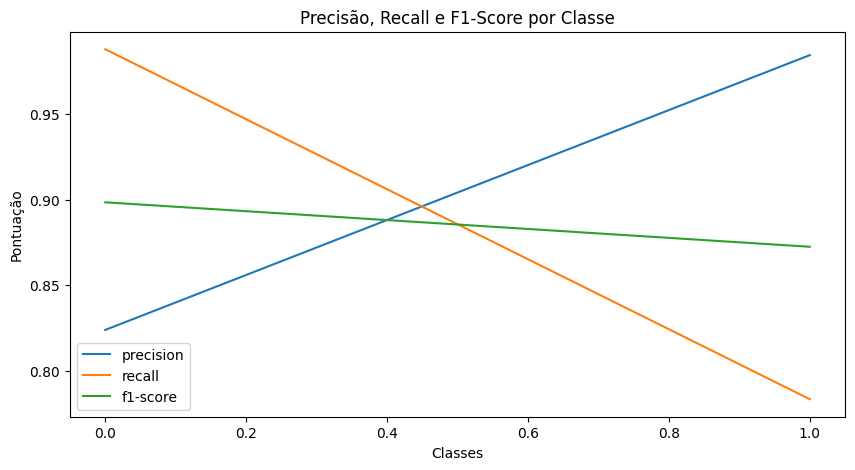

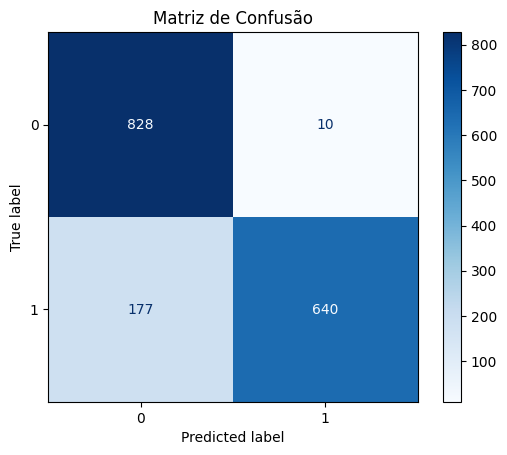

In [13]:
# Avaliar o modelo
loss, accuracy = model.evaluate(X_val, y_val)
print(f"Loss: {loss}")
print(f"Accuracy: {accuracy}")
y_pred = model.predict(X_val)
y_pred_classes = np.argmax(y_pred, axis=1)
report = classification_report(y_val, y_pred_classes, output_dict=True)
print(classification_report(y_val, y_pred_classes))

fig, ax = plt.subplots(figsize=(10, 5))

metrics = ['precision', 'recall', 'f1-score']
for i, metric in enumerate(metrics):
    values = [report[str(label)][metric] for label in np.unique(y_val)]
    ax.plot(np.unique(y_val), values, label=metric)

ax.set_xlabel('Classes')
ax.set_ylabel('Pontuação')
ax.set_title('Precisão, Recall e F1-Score por Classe')
ax.legend()
plt.savefig(os.path.join(metrics_save_path, "metricas.png"))
plt.show()

# Matriz de Confusão
cm = confusion_matrix(y_val, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=np.unique(y_val))
disp.plot(cmap=plt.cm.Blues)
plt.title('Matriz de Confusão')
plt.savefig(os.path.join(metrics_save_path, "matriz_de_confusao.png"))
plt.show()
